In [1]:
!git clone https://github.com/aubinbnf/Speech-Emotion-Recognition.git
%cd Speech-Emotion-Recognition
!git branch -r
!git switch simon
# !git switch simon
!git status
!git pull simon


Cloning into 'Speech-Emotion-Recognition'...
remote: Enumerating objects: 4404, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4404 (delta 0), reused 1 (delta 0), pack-reused 4402 (from 1)
Receiving objects: 100% (4404/4404), 281.75 MiB | 9.89 MiB/s, done.
Resolving deltas: 100% (255/255), done.
/content/Speech-Emotion-Recognition
  origin/HEAD -> origin/master
  origin/aubin
  origin/master
  origin/simon
Branch 'simon' set up to track remote branch 'simon' from 'origin'.
Switched to a new branch 'simon'
On branch simon
Your branch is up to date with 'origin/simon'.

nothing to commit, working tree clean
fatal: 'simon' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


Using GPU: /physical_device:GPU:0
Training set: (1008, 256, 256, 3), (1008, 8)
Validation set: (216, 256, 256, 3), (216, 8)
Test set: (216, 256, 256, 3), (216, 8)
Reshaped Training set: (1008, 256, 768)
Reshaped Validation set: (216, 256, 768)
Reshaped Test set: (216, 256, 768)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_1                │ (None, 256, 768)            │           3,072 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 256, 128)            │         459,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 521,096 (1.99 MB)

 Trainable params: 519,560 (1.98 MB)

 Non-trainable params: 1,536 (6.00 KB)

None
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.1185 - loss: 2.1012
Epoch 1: val_loss improved from inf to 2.06235, saving model to best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 928ms/step - accuracy: 0.1189 - loss: 2.1008 - val_accuracy: 0.1343 - val_loss: 2.0624
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.2073 - loss: 2.0320
Epoch 2: val_loss improved from 2.06235 to 2.04259, saving model to best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 903ms/step - accuracy: 0.2069 - loss: 2.0320 - val_accuracy: 0.1435 - val_loss: 2.0426
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.2133 - loss: 1.9716
Epoch 3: val_loss did not improve from 2.04259
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 929ms/step - accuracy: 0.2133 - loss: 1.9718 - val_accuracy: 0.1620 - val_loss: 2.0557
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 907ms/step - accuracy: 0.2812 - loss: 1.9161
Epoch 4: val_loss improved from 2.04259 to 2.00349, saving model to best_model.keras

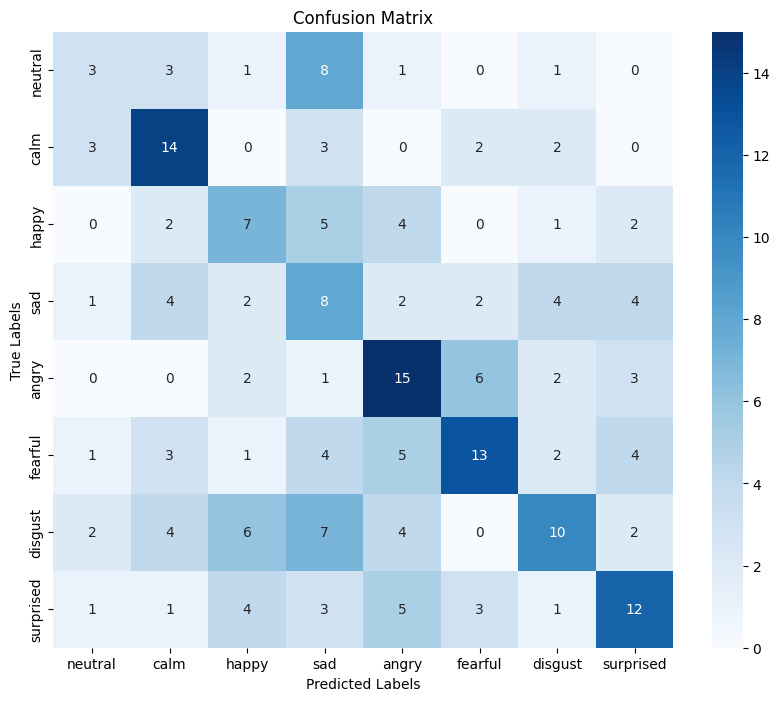

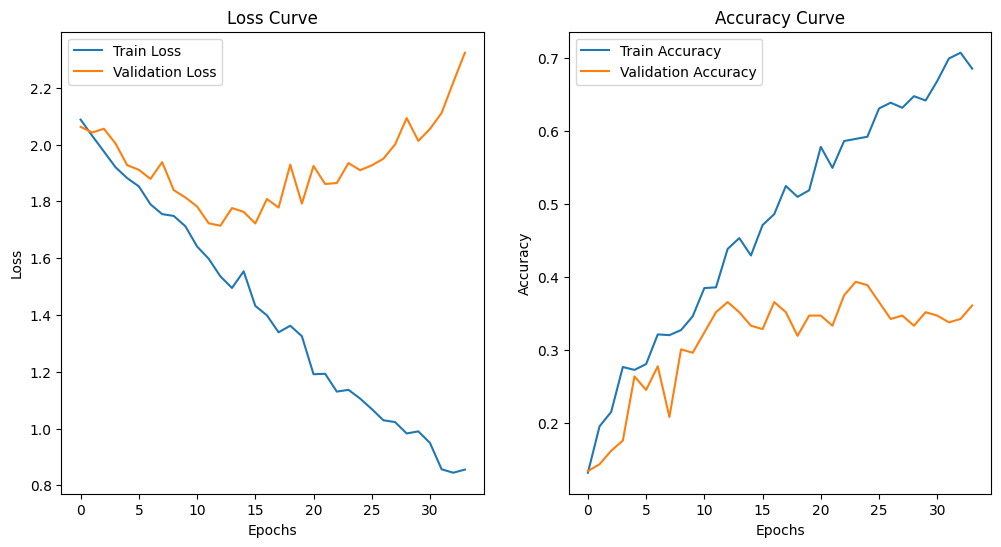

In [3]:
#!/usr/bin/env python3

# Import required libraries
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, BatchNormalization, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd


# Check if GPU is available and set TensorFlow to use it
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU:", physical_devices[0].name)
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU found. Using CPU.")

# Load spectrograms
spectrograms_dir = "audio_representations/spectrograms"
images = []
labels = []

for file_name in os.listdir(spectrograms_dir):
    if file_name.endswith(".png"):
        file_path = os.path.join(spectrograms_dir, file_name)

        # Load and resize image
        img = Image.open(file_path).convert("RGB")
        img = img.resize((256, 256))
        img_array = np.array(img)
        images.append(img_array)

        # Extract label from filename
        label = int(file_name.split("-")[2]) - 1  # Emotions start at 1, adjust to 0-based indexing
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Normalize images
images = images / 255.0

# One-hot encode labels
num_classes = len(np.unique(labels))
labels_one_hot = to_categorical(labels, num_classes=num_classes)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# Reshape the image data for LSTM
# Treat each row of the image as a time step, and each column/channel as features
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], -1)  # (batch, 256, 256*3)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

print(f"Reshaped Training set: {X_train_reshaped.shape}")
print(f"Reshaped Validation set: {X_val_reshaped.shape}")
print(f"Reshaped Test set: {X_test_reshaped.shape}")

# Define LSTM model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(BatchNormalization(input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
    model.add(LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])  # (time steps, features)
model = create_model(input_shape, num_classes)
print(model.summary())

# Define callbacks
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='best_model.keras', verbose=1, save_best_only=True)

# Train the model
with tf.device('/GPU:0'):  # Explicitly set GPU usage
    history = model.fit(X_train_reshaped, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_data=(X_val_reshaped, y_val),
                        callbacks=[earlystop, checkpointer])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, batch_size=32)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions for the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
emotions = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
cm_df = pd.DataFrame(cm, index=emotions, columns=emotions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()
